## Análisis de incidencias delictivas en el estado de Sonora
Utilizando los datos proporcionados por el gobierno de México acerca de las incidencias delictivas en el país, se creo una base de datos filtrando la información para obtener las incidencias delictivas en el estado.

En la presente libreta se realizan las ejecutan necesarias para realizar un analisis de las denuncias en Sonora desde 2015 hasta 2021, finalizando con la ilustración de los datos obtenidos mediante una gráfica treemap.

#### Importamos las librerias que utilizaremos

In [1]:
import db_functions as mysql
import numpy as np
from matplotlib import pyplot as plt
import squarify
import os
import seaborn as sns

Nos conectamos a la base de datos *denuncias*

In [2]:
# Loading credentials
if(os.environ.get("DB_TYPE") == None):
    from dotenv import load_dotenv
    from config.definitions import ROOT_DIR
    print(ROOT_DIR)
    load_dotenv(os.path.join(ROOT_DIR, 'config', 'conf', '.env'))

C:/Users/abrah/Documents/Repos/data-visualization


In [3]:
connection = mysql.create_db_connection("localhost",os.environ.get("DB_USER"),os.environ.get("DB_PASS"),os.environ.get("DB_NAME"))

MySQL DB connection succesful


Para el análisis debemos tener en cuenta los siguientes puntos:
 * Utilizaremos la vista **v_delitos_son** para realizar nuestras consultas a la base de datos
 * Necesitamos filtrar la información por año.
 * Nos interesa la frecuencia con la que ocurrio un tipo de delito.
 * Realizaremos un treemap por año y uno final que contenga todos.

### Tipos de delitos registrados en la base de datos

In [4]:
# Tipos de delito
query = """
SELECT DISTINCT TipoDelito FROM v_delitos_son;
"""
tipos = mysql.read_query(connection,query)

In [5]:
print([i[0] for i in tipos])

['Lesiones', 'Tráfico de menores', 'Otros delitos que atentan contra la libertad personal', 'Corrupción de menores', 'Homicidio', 'Rapto', 'Trata de personas', 'Feminicidio', 'Otros delitos que atentan contra la vida y la integridad corporal', 'Secuestro', 'Otros delitos contra la sociedad', 'Extorsión', 'Aborto']


### Treemap
Función encargada de realizar la grafica de árbol.

In [6]:
def plot_treemap(query, year):
    norm_data = squarify.normalize_sizes([int(tipo[1]) for tipo in query],dx=7,dy=7)
    labels = [tipo[0] for tipo in query]
    values = [int(tipo[1]) for tipo in query]
    cmap =  sns.color_palette("cubehelix", as_cmap=True)
    colors = [cmap(i) for i in np.arange(0, 1, 1/len(values))]
    fig = plt.figure(figsize=(12,10))
    fig.suptitle("Incidencias delictivas en Sonora",fontsize=20)
    ax = squarify.plot(sizes=norm_data,alpha=0.8, pad=True, color=colors)
    ax.get_xaxis().set_visible(False)
    plt.legend(handles=ax.containers[0], labels=labels,title="Tipos de delito",title_fontsize=16, loc='lower left',bbox_to_anchor=(0,0),fancybox=True,framealpha=0.5,shadow=True,borderpad=1)
    plt.axis('off')
    plt.title(year,fontsize=14)
    plt.subplots_adjust(top=0.9)
    plt.show()
    return

### Incidencias delictivas en Sonora en 1995

In [7]:
### Incidencias delictivas en Sonora en 1995
# Query
query = """
SELECT TipoDelito, SUM(Ocurrencias) FROM v_delitos_son WHERE YEAR(Fecha) = 2015 GROUP BY TipoDelito;
"""
del_2015 = mysql.read_query(connection,query)

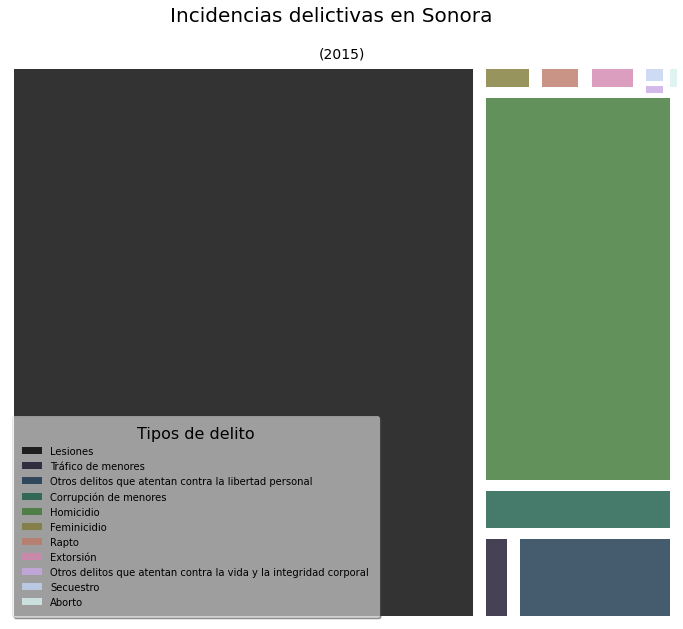

In [8]:
plot_treemap(del_2015, "(2015)")

De la gráfica podemos observar que el tipo de delito más frecuente de las denuncias registradas en Sonora durante el año 1995 fue *Lesiones*, mientras que el menos frecuente fue el *Aborto*.

---

### Incidencias delictivas en Sonora en 2021

In [9]:
# Query
query = """
SELECT TipoDelito, SUM(Ocurrencias) FROM v_delitos_son WHERE YEAR(Fecha) = 2021 GROUP BY TipoDelito;
"""
del_2021 = mysql.read_query(connection,query)

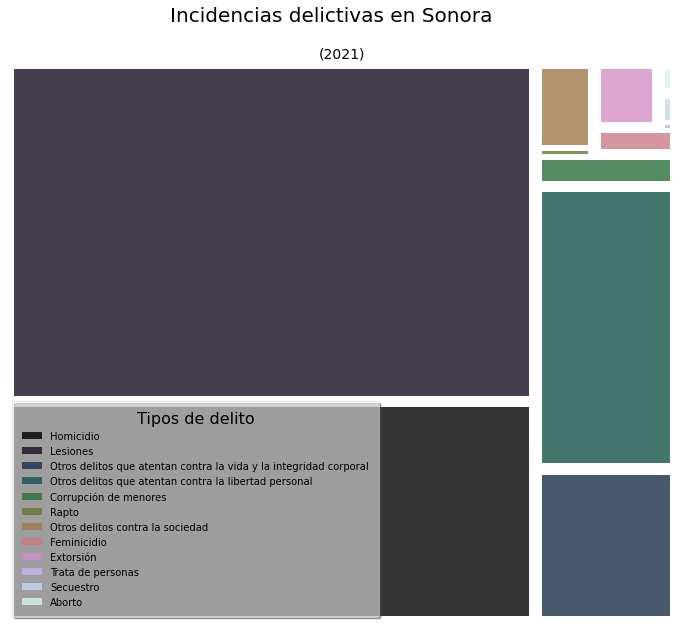

In [10]:
plot_treemap(del_2021, "(2021)")

De la gráfica podemos observar que el tipo de delito más frecuente de las denuncias registradas en Sonora durante el año 2021 fue *Lesiones*, mientras que el menos frecuente fue el tipo *Trata de personas*.

---

### Incidencias delicitvas en Sonora (2015-2021)

In [11]:
# Query
query = """
SELECT TipoDelito, SUM(Ocurrencias) FROM v_delitos_son WHERE YEAR(Fecha) < 2022 GROUP BY TipoDelito;
"""
delinc = mysql.read_query(connection,query)

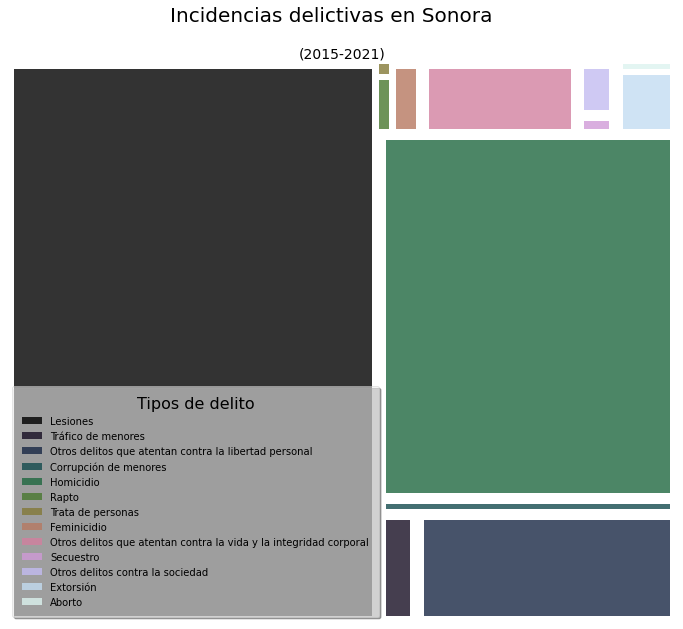

In [12]:
plot_treemap(delinc, "(2015-2021)")

De la gráfica podemos observar que el tipo de delito más frecuente de las denuncias registradas en Sonora desde 1995 hasta 2021 fue *Lesiones*, mientras que el menos frecuente fue el tipo *Trata de personas*.

#### Cerrando la conexión con la base de datos

In [13]:
connection.close()